In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [4]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_day.apply(pd.unique)

instant       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dteday        [2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0...
season                                             [1, 2, 3, 4]
yr                                                       [0, 1]
mnth                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
holiday                                                  [0, 1]
weekday                                   [6, 0, 1, 2, 3, 4, 5]
workingday                                               [0, 1]
weathersit                                            [2, 1, 3]
temp          [0.344167, 0.363478, 0.196364, 0.2, 0.226957, ...
atemp         [0.363625, 0.353739, 0.189405, 0.212122, 0.229...
hum           [0.805833, 0.696087, 0.437273, 0.590435, 0.436...
windspeed     [0.160446, 0.248539, 0.248309, 0.160296, 0.186...
casual        [331, 131, 120, 108, 82, 88, 148, 68, 54, 41, ...
registered    [654, 670, 1229, 1454, 1518, 1362, 891, 768, 1...
cnt           [985, 801, 1349, 1562, 160

In [7]:
print('Categorical columns are : season, yr, mnth, holiday, weekday, workingday, weathersit')

Categorical columns are : season, yr, mnth, holiday, weekday, workingday, weathersit


In [8]:
df_day.describe().T 

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [9]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<AxesSubplot: >

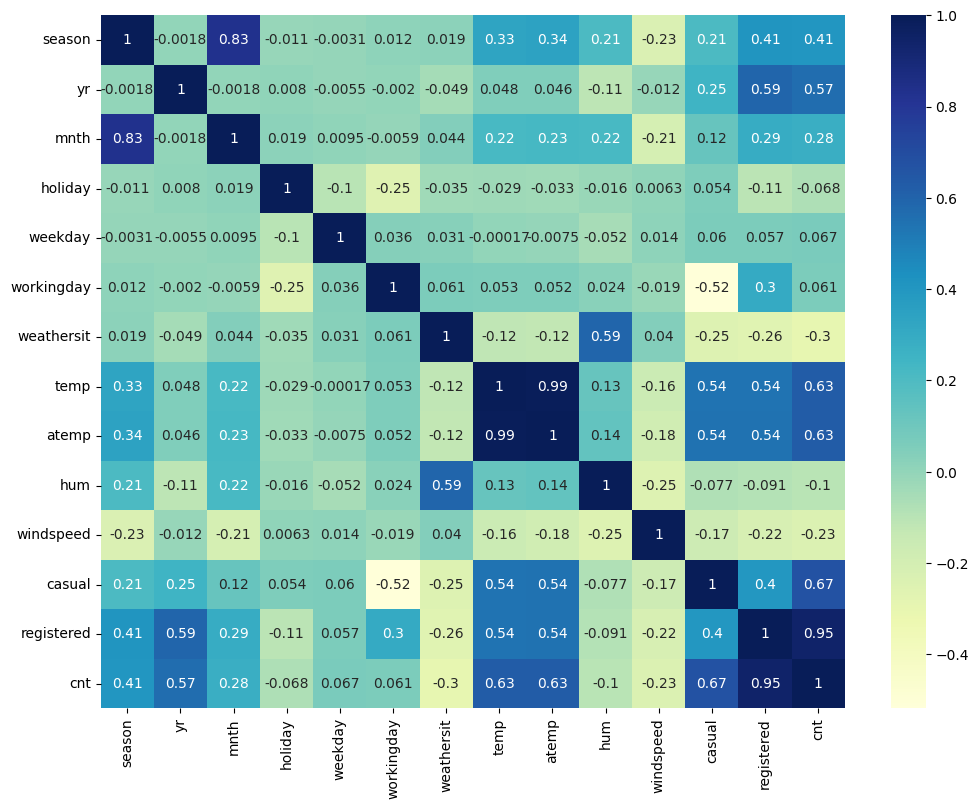

In [406]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.heatmap(df_day1.corr(), cmap="YlGnBu", annot=True)

In [10]:
df_day1 = df_day.drop(columns=['instant', 'dteday','temp'])

In [11]:
df_day1

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.231700,0.483333,0.350754,364,1432,1796


<AxesSubplot: xlabel='dteday', ylabel='cnt'>

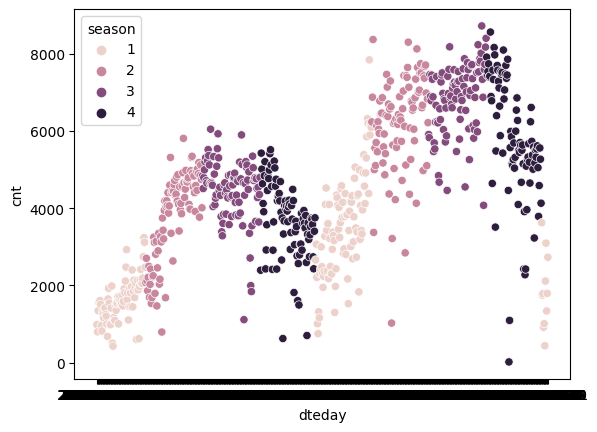

In [12]:
sns.scatterplot(data=df_day, x="dteday", y="cnt", hue="season")

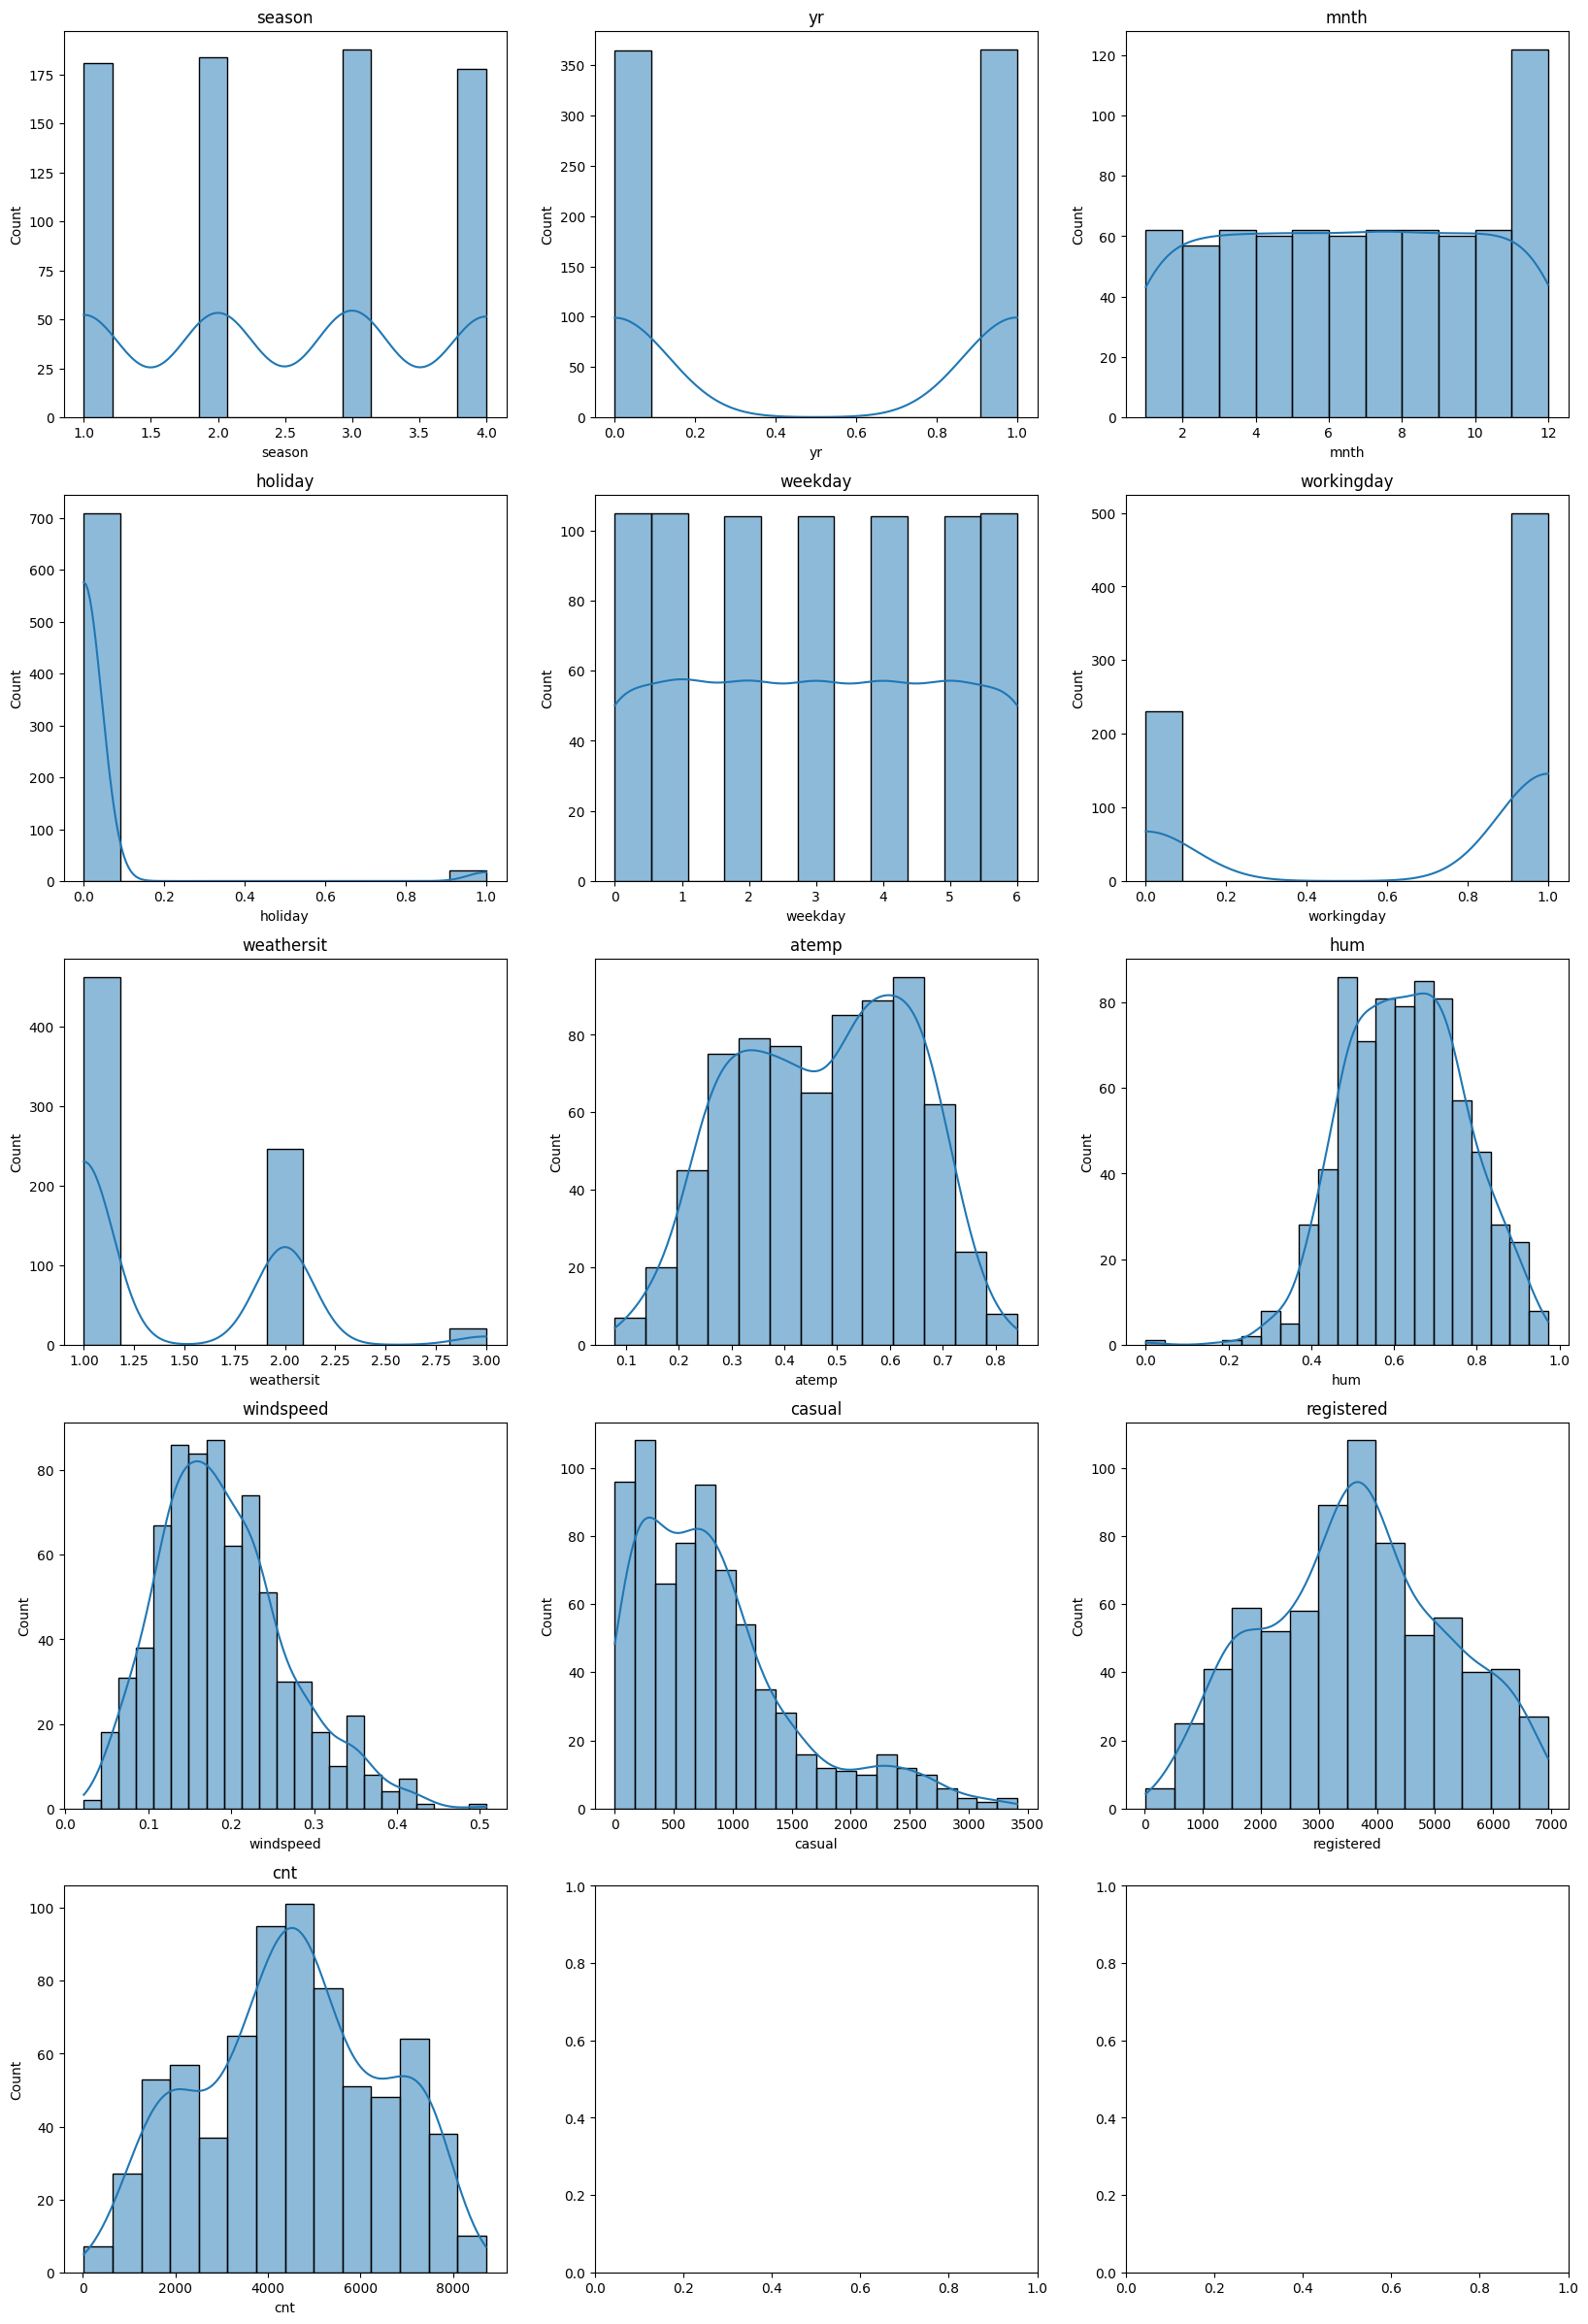

In [13]:
cals = ['mnth', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']
fig, axes = plt.subplots(nrows = 2, ncols = 4)    
axes = axes.flatten()        
fig.set_size_inches(20, 30)

for ax, col in zip(axes, cals):
  sns.histplot(df_day[col], ax = ax,kde=True)
  ax.set_title(col)

In [14]:
df_day_dummies = pd.get_dummies(data= df_day1, columns=['season', 'yr', 'holiday', 'weekday','workingday', 'weathersit'])
df_day_dummies.head(5)

,mnth,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,0.363625,0.805833,0.160446,331,654,985,1,0,0,...,0,0,0,0,1,1,0,0,1,0
1,1,0.353739,0.696087,0.248539,131,670,801,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,...,1,0,0,0,0,0,1,1,0,0
4,1,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,...,0,1,0,0,0,0,1,1,0,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# 1- Linear Regression

In [16]:
X = df_day1.drop('cnt', axis = 1).values
y = df_day1['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [17]:
model_linearRegression = make_pipeline(StandardScaler(), LinearRegression())

In [18]:
model_linearRegression.fit(X_train, y_train)
y_pred = model_linearRegression.predict(X_test)
mean_squared_error(y_test, y_pred)

1.987113426064887e-24

# Linear Regression on Dummies:

In [19]:
X = df_day_dummies.drop('cnt', axis = 1).values
y = df_day_dummies['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [20]:
model_linearRegression.fit(X_train, y_train)
y_pred = model_linearRegression.predict(X_test)
mean_squared_error(y_test, y_pred)

1.082948617866299e-23

# 2- Polynomial Regression:

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
X = df_day1.drop('cnt', axis = 1).values
y = df_day1['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [23]:
model_poly = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(),LinearRegression())
model_poly.fit(X_train, y_train)
y_pred = model_poly.predict(X_test)
mean_squared_error(y_test, y_pred)

4.102787638923953e-22

# Polynomial Regression on Dummies:

In [24]:
X = df_day_dummies.drop('cnt', axis = 1).values
y = df_day_dummies['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [25]:
model_poly = make_pipeline(PolynomialFeatures(degree=1),StandardScaler(), LinearRegression())
model_poly.fit(X_train, y_train)
y_pred = model_poly.predict(X_test)
mean_squared_error(y_test, y_pred)

2.928783355219004e-23

# 3- Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

In [27]:
X = df_day1.drop('cnt', axis = 1).values
y = df_day1['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [28]:
model_Ridge = make_pipeline(Ridge(alpha = 0.2))
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)
mean_squared_error(y_test, y_pred)

1.0294294619022038e-12

# Ridge Regression in Dummies:

In [29]:
X = df_day_dummies.drop('cnt', axis = 1).values
y = df_day_dummies['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [30]:
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)
mean_squared_error(y_test, y_pred)

1.2265882468822546e-12

# 4- Lasso Regression

In [31]:
from sklearn import linear_model

In [32]:
X = df_day1.drop('cnt', axis = 1).values
y = df_day1['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [33]:
model_Ridge = make_pipeline(linear_model.Lasso(alpha = 0.5))
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)
mean_squared_error(y_test, y_pred)

1.1093254564200993e-05

# Lasso Regression in Dummies:

In [34]:
X = df_day_dummies.drop('cnt', axis = 1).values
y = df_day_dummies['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [35]:
model_Ridge = make_pipeline(StandardScaler(),linear_model.Lasso(0.082))
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)
mean_squared_error(y_test, y_pred)

0.014308262370633155

# 5- Elasticnet Regression

In [36]:
from sklearn.linear_model import ElasticNet

In [37]:
X = df_day1.drop('cnt', axis = 1).values
y = df_day1['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [38]:
model_Ridge = make_pipeline(linear_model.ElasticNet(alpha=0.2, l1_ratio=0.1))
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)
mean_squared_error(y_test, y_pred)

3.5235843323382106e-07

# 5- Elasticnet Regression on dummies

In [39]:
X = df_day_dummies.drop('cnt', axis = 1).values
y = df_day_dummies['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [40]:
model_Ridge = make_pipeline(linear_model.ElasticNet(alpha=0.2, l1_ratio=0.1))
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)
mean_squared_error(y_test, y_pred)

4.1210905990226265e-07

# 6- Stacking

In [44]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [45]:
X = df_day1.drop('cnt', axis = 1).values
y = df_day1['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [46]:
estimators = [('lasso', make_pipeline(StandardScaler(), linear_model.Lasso(0.082))),('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
Stacking = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
Stacking.fit(X_train, y_train)
y_pred = Stacking.predict(X_test)
mean_squared_error(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


121.59913636363562